In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sd
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

iris = sd.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# 查看数据集统计情况
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

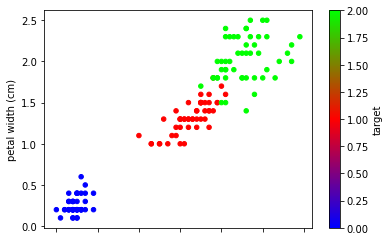

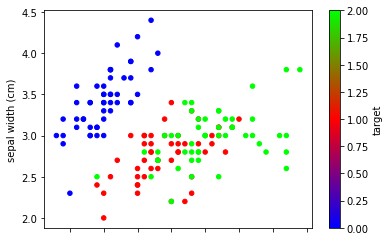

In [14]:

# 可视化
data.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target',
                  cmap='brg', s=20)

# 可视化
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target',
                  cmap='brg', s=20)

In [16]:
# 整理数据集。拆分测试集训练集
x, y = data.iloc[:, :-1], data['target']
train_x, test_x, train_y, test_y = ms.train_test_split(x, y,
                                                       test_size=0.25,
                                                       random_state=7)

model = svm.SVC(kernel='linear')
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 打印分类报告和混淆矩阵
print(sm.classification_report(test_y, pred_test_y))
cr = sm.confusion_matrix(test_y, pred_test_y)
print(cr)
print(123)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

[[11  0  0]
 [ 0 13  1]
 [ 0  0 13]]
